# Classification

# I. Introduction

The main objective of the classification assignment is to apply different Classification algorithms on the bank marketing dataset and predict whether the client subscribed to the term deposit that was marketed by the bank. The dataset contains several features like the details about the customer and the previous campaign details for them. Based on the features available in the dataset, Classification models like Pocket Algorithm, Quadratic Discriminant Analysis (QDA), Linear Discriminant Analysis (LDA), and Logistic Regression would be applied to understand the accuracy of each model.

In the first part of the assignment, preprocessing and data visualization are performed to better understand the relationships among different columns and find observations that can be used for the next part.

In the second part of this assignment, the preprocessed dataset is applied to the different classification models to predict the accurate results for the outcome of the marketing campaign. In order to apply the classification algorithms, the data is split into training and test data. After applying each classification model, the prediction will be analyzed and visualized to understand it's accuracy and performance. After applying all the classification algorithms, the best predicting model will be selected to solve the problem.

# II. Data

# Bank Marketing Dataset

This dataset is provided by Laureano and Cortez's research which was focused on targeting the bank telemarketing phone calls to sell longterm deposits to the clients. In this campaign, the human agents executed phone calls to the list of clients for selling the deposit or if meanwhile the client called the call center for some other purpose and was asked to subscribe to the deposit. This resulted in a binary result, whether it was successful or unsuccessful. This study contains the real data collected from a Portuguese retail bank, from May 2008 to June 2013, totaling 52,944 phone contacts.

The dataset provides several input variables to create a classification model to determine whether the client has subscribed to the term deposit or not. The variables provided in the dataset contains information about the client as well as the campaign outcomes to better classify the target outcome.


### Below is the information provided in the dataset:

- age
- job type
- marital status
- education
- default - Has credit in default?
- balance: Average yearly balance (€uros)
- housing - Has a housing loan?
- loan - Has a personal loan?
- contact - Communication type
- day - Last contact day of the month
- month - Last contact month of the year
- duration - Last contact duration (in seconds)
- campaign - Number of contacts performed during this campaign for that particular client
- pdays - Number of days that passed by after the client was last contacted from a previous campaign
    - -1 means that the client was not previously contacted
- previous - Number of contacts performed before this campaign for that particular client
- poutcome - Outcome of the previous marketing campaign
- y - Binary evaluation of whether the client subscribed to a term deposit?

The dataset contains a total of 17 columns and 45,211 records. With the help of all the details provided from the dataset, I will try to gain insights from the data through a cycle of preprocessing, visualization, and finally applying classification algorithm to predict whether the client will subscribe to the term deposit or not.

### Data Preprocessing:
In this process, I will clean, transform, and organize the dataset to ensure that the rows do not contain any missing values or duplicates which could cause inconsistency in the later process. The main focus of this step will be to ensure that the data is fit for visualizing and understanding patterns for the prediction model.

### Data Visualization:
In this process, I will utilize several data visualization techniques to understand the relationship among different features in the dataset. This will allow me to find out which variables have a high correlation in predicting the house price

### Data Observation:
After applying the data visualization, I will record the observations made from the data to help develop an accurate machine learning model.

### Prediction Model Using Classification:
In this section, Pocket Algorithm, LDA, QDA and  Logistic Regression models will be implemented and applied on the dataset.

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('marketing_data/bank-full.csv', delimiter=";")
data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [4]:
data.shape

(45211, 17)

In [5]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

### Check for Null values

In [6]:
data.isnull().any(axis=1).sum()

0

#### The dataset does not have any null values.

### Check for duplicates

In [7]:
data.duplicated().sum()

0

In [8]:
data.duplicated().any()

False

There are no duplicates observed in the dataset

In [9]:
def get_sorted(mydict):
    ''' Method to print out sorted dictionary '''
    for key in sorted(mydict):
        print(key, mydict[key])

### Sampling 10,000 rows from the dataset

In [10]:
data = data.sample(10000)

### Converting the job column into categorical column

In [11]:
data['job'].value_counts()

management       2139
blue-collar      2070
technician       1670
admin.           1153
services          939
retired           511
self-employed     335
entrepreneur      330
housemaid         299
unemployed        286
student           210
unknown            58
Name: job, dtype: int64

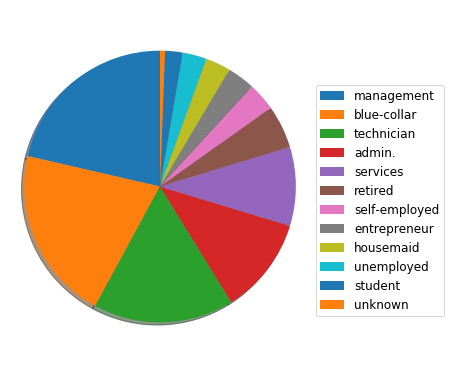

In [12]:
fig1, ax1 = plt.subplots(figsize=(6, 5))
fig1.subplots_adjust(0.3, 0, 1, 1)
ax1.pie(data['job'].value_counts().tolist(), shadow=True, startangle=90)
plt.legend(data['job'].value_counts().keys().tolist(),
           bbox_to_anchor=(1.0, 0.8),
           fontsize=12,
           loc="upper left")
ax1.axis('equal')
plt.show()

The highest number of customers worked either a blue-collar job, management, technician, or admin.

In [13]:
data['job'] = data['job'].astype('category')
job_dic = dict(zip(data['job'].cat.codes, data['job']))
get_sorted(job_dic)

0 admin.
1 blue-collar
2 entrepreneur
3 housemaid
4 management
5 retired
6 self-employed
7 services
8 student
9 technician
10 unemployed
11 unknown


In [14]:
data['job'] = data['job'].cat.codes

In [15]:
data['job'].head(5)

30530    2
22450    3
12650    7
4387     4
10452    7
Name: job, dtype: int8

### Converting the marital column into categorical column

In [16]:
data["marital"].value_counts()

married     6064
single      2835
divorced    1101
Name: marital, dtype: int64

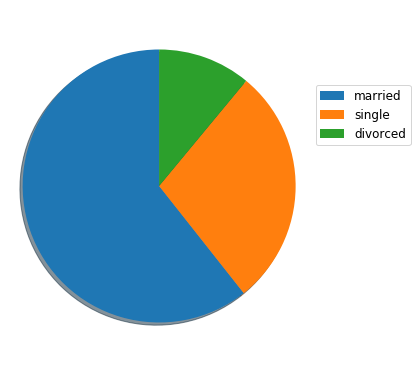

In [17]:
fig1, ax1 = plt.subplots(figsize=(6, 5))
fig1.subplots_adjust(0.3, 0, 1, 1)
ax1.pie(data["marital"].value_counts().tolist(), shadow=True, startangle=90)
plt.legend(data["marital"].value_counts().keys().tolist(),
           bbox_to_anchor=(1.0, 0.8),
           fontsize=12,
           loc="upper left")
ax1.axis('equal')
plt.show()

Married customers were approached higher than single or divorced customers.

In [18]:
data["marital"] = data["marital"].astype('category')
marital_dic = dict(zip(data["marital"].cat.codes, data["marital"]))
get_sorted(marital_dic)

0 divorced
1 married
2 single


In [19]:
data["marital"] = data["marital"].cat.codes

In [20]:
data["marital"].head(5)

30530    1
22450    1
12650    2
4387     2
10452    1
Name: marital, dtype: int8

### Converting the education column into categorical column

In [21]:
data["education"].value_counts()

secondary    5071
tertiary     2972
primary      1533
unknown       424
Name: education, dtype: int64

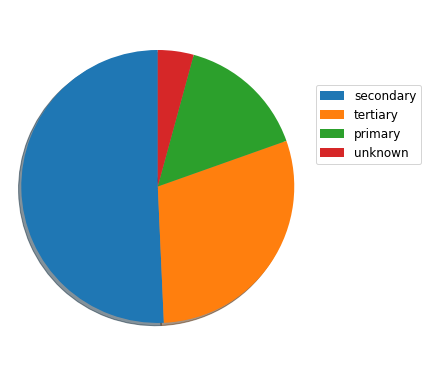

In [22]:
fig1, ax1 = plt.subplots(figsize=(6, 5))
fig1.subplots_adjust(0.3, 0, 1, 1)
ax1.pie(data["education"].value_counts().tolist(), shadow=True, startangle=90)
plt.legend(data["education"].value_counts().keys().tolist(),
           bbox_to_anchor=(1.0, 0.8),
           fontsize=12,
           loc="upper left")
ax1.axis('equal')
plt.show()

It looks like half of the clients approached had primary education.

In [23]:
data["education"] = data["education"].astype('category')
education_dic = dict(zip(data["education"].cat.codes, data["education"]))
get_sorted(education_dic)

0 primary
1 secondary
2 tertiary
3 unknown


In [24]:
data["education"] = data["education"].cat.codes

In [25]:
data["education"].head(5)

30530    2
22450    1
12650    0
4387     2
10452    1
Name: education, dtype: int8

### Converting the default column into categorical column

In [26]:
data["default"].value_counts()

no     9802
yes     198
Name: default, dtype: int64

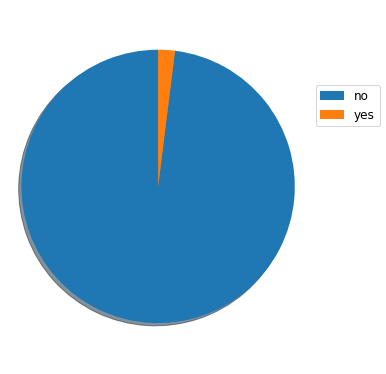

In [27]:
fig1, ax1 = plt.subplots(figsize=(6, 5))
fig1.subplots_adjust(0.3, 0, 1, 1)
ax1.pie(data["default"].value_counts().tolist(), shadow=True, startangle=90)
plt.legend(data["default"].value_counts().keys().tolist(),
           bbox_to_anchor=(1.0, 0.8),
           fontsize=12,
           loc="upper left")
ax1.axis('equal')
plt.show()

The highest number of approached clients had a credit default.

In [28]:
data["default"] = data["default"].astype('category')
default_dic = dict(zip(data["default"].cat.codes, data["default"]))
get_sorted(default_dic)

0 no
1 yes


In [29]:
data["default"] = data["default"].cat.codes

In [30]:
data["default"].head(10)

30530    0
22450    0
12650    0
4387     0
10452    0
24374    0
12188    0
24939    0
9386     0
34289    0
Name: default, dtype: int8

### Converting the housing column into categorical column

In [31]:
data["housing"].value_counts()

yes    5544
no     4456
Name: housing, dtype: int64

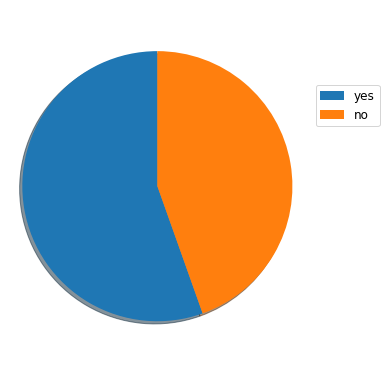

In [32]:
fig1, ax1 = plt.subplots(figsize=(6, 5))
fig1.subplots_adjust(0.3, 0, 1, 1)
ax1.pie(data["housing"].value_counts().tolist(), shadow=True, startangle=90)
plt.legend(data["housing"].value_counts().keys().tolist(),
           bbox_to_anchor=(1.0, 0.8),
           fontsize=12,
           loc="upper left")
ax1.axis('equal')
plt.show()

More than half of the clients had a housing loan.

In [33]:
data["housing"] = data["housing"].astype('category')
housing_dic = dict(zip(data["housing"].cat.codes, data["housing"]))
get_sorted(housing_dic)

0 no
1 yes


In [34]:
data["housing"] = data["housing"].cat.codes

In [35]:
data["housing"].head(5)

30530    1
22450    0
12650    0
4387     1
10452    0
Name: housing, dtype: int8

### Converting the loan column into categorical column

In [36]:
data["loan"].value_counts()

no     8364
yes    1636
Name: loan, dtype: int64

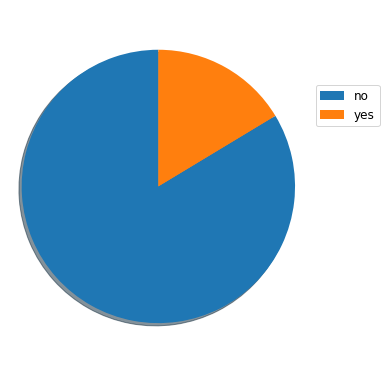

In [37]:
fig1, ax1 = plt.subplots(figsize=(6, 5))
fig1.subplots_adjust(0.3, 0, 1, 1)
ax1.pie(data["loan"].value_counts().tolist(), shadow=True, startangle=90)
plt.legend(data["loan"].value_counts().keys().tolist(),
           bbox_to_anchor=(1.0, 0.8),
           fontsize=12,
           loc="upper left")
ax1.axis('equal')
plt.show()

Almost 70% of the approached customers had a personal loan.

In [38]:
data["loan"] = data["loan"].astype('category')
loan_dic = dict(zip(data["loan"].cat.codes, data["loan"]))
get_sorted(loan_dic)

0 no
1 yes


In [39]:
data["loan"] = data["loan"].cat.codes

In [40]:
data["loan"].head(5)

30530    0
22450    0
12650    0
4387     0
10452    1
Name: loan, dtype: int8

### Converting the contact column into categorical column

In [41]:
data["contact"].value_counts()

cellular     6479
unknown      2855
telephone     666
Name: contact, dtype: int64

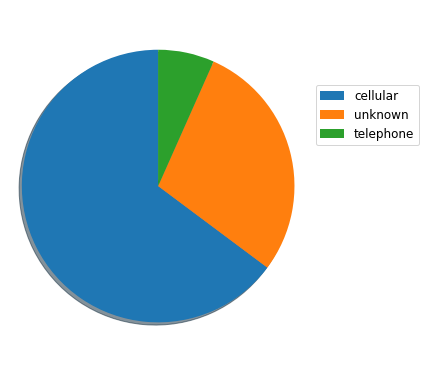

In [42]:
fig1, ax1 = plt.subplots(figsize=(6, 5))
fig1.subplots_adjust(0.3, 0, 1, 1)
ax1.pie(data["contact"].value_counts().tolist(), shadow=True, startangle=90)
plt.legend(data["contact"].value_counts().keys().tolist(),
           bbox_to_anchor=(1.0, 0.8),
           fontsize=12,
           loc="upper left")
ax1.axis('equal')
plt.show()

The clients were approached higher through their cell phones.

In [43]:
data["contact"] = data["contact"].astype('category')
contact_dic = dict(zip(data["contact"].cat.codes, data["contact"]))
get_sorted(contact_dic)

0 cellular
1 telephone
2 unknown


In [44]:
data["contact"] = data["contact"].cat.codes

In [45]:
data["contact"].head(-10)

30530    0
22450    0
12650    2
4387     2
10452    2
        ..
21254    1
1948     2
445      2
20084    0
24219    0
Name: contact, Length: 9990, dtype: int8

### Converting the month column into categorical column

In [46]:
data["month"].value_counts()

may    2975
jul    1517
aug    1338
jun    1190
nov     939
apr     641
feb     619
jan     315
oct     173
mar     121
sep     121
dec      51
Name: month, dtype: int64

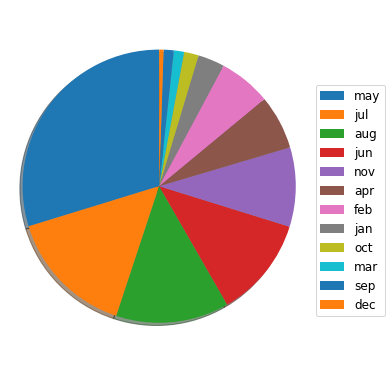

In [47]:
fig1, ax1 = plt.subplots(figsize=(6, 5))
fig1.subplots_adjust(0.3, 0, 1, 1)
ax1.pie(data["month"].value_counts().tolist(), shadow=True, startangle=90)
plt.legend(data["month"].value_counts().keys().tolist(),
           bbox_to_anchor=(1.0, 0.8),
           fontsize=12,
           loc="upper left")
ax1.axis('equal')
plt.show()

It seems that the marketing campaign was highly active in May, June, July, and August (Summer season).

In [48]:
months = {
    'jan': 1,
    'feb': 2,
    'mar': 3,
    'apr': 4,
    'may': 5,
    'jun': 6,
    'jul': 7,
    'aug': 8,
    'sep': 9,
    'oct': 10,
    'nov': 11,
    'dec': 12
}

#### Changing the months from string to integers

In [49]:
data['month'] = data['month'].apply(lambda x: months[x])

In [50]:
data['month'].value_counts()

5     2975
7     1517
8     1338
6     1190
11     939
4      641
2      619
1      315
10     173
3      121
9      121
12      51
Name: month, dtype: int64

### Converting the poutcome column into categorical column

In [51]:
data["poutcome"].value_counts()

unknown    8153
failure    1096
other       426
success     325
Name: poutcome, dtype: int64

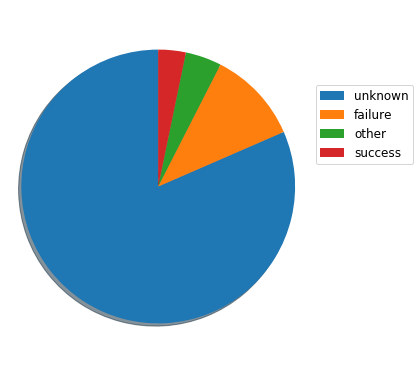

In [52]:
fig1, ax1 = plt.subplots(figsize=(6, 5))
fig1.subplots_adjust(0.3, 0, 1, 1)
ax1.pie(data["poutcome"].value_counts().tolist(), shadow=True, startangle=90)
plt.legend(data["poutcome"].value_counts().keys().tolist(),
           bbox_to_anchor=(1.0, 0.8),
           fontsize=12,
           loc="upper left")
ax1.axis('equal')
plt.show()

The previous outcome for the marketing for most of the approached customers was unknown. It seems that they approached more to the clients who did not subscribe to last marketing campaign.

In [53]:
data["poutcome"] = data["poutcome"].astype('category')
poutcome_dic = dict(zip(data["poutcome"].cat.codes, data["poutcome"]))
get_sorted(poutcome_dic)

0 failure
1 other
2 success
3 unknown


In [54]:
data["poutcome"] = data["poutcome"].cat.codes

In [55]:
data["poutcome"].head(5)

30530    3
22450    3
12650    3
4387     3
10452    3
Name: poutcome, dtype: int8

### Converting the target: y column into categorical column

In [56]:
data["y"].value_counts()

no     8855
yes    1145
Name: y, dtype: int64

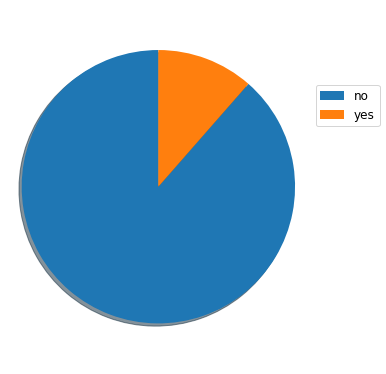

In [57]:
fig1, ax1 = plt.subplots(figsize=(6, 5))
fig1.subplots_adjust(0.3, 0, 1, 1)
ax1.pie(data["y"].value_counts().tolist(), shadow=True, startangle=90)
plt.legend(data["y"].value_counts().keys().tolist(),
           bbox_to_anchor=(1.0, 0.8),
           fontsize=12,
           loc="upper left")
ax1.axis('equal')
plt.show()

The current marketing campaign seems to have a very less success rate based on the number of customers who chose to subscribe.

In [58]:
data["y"] = data["y"].astype('category')
y_dic = dict(zip(data["y"].cat.codes, data["y"]))
get_sorted(y_dic)

0 no
1 yes


In [59]:
data["y"] = data["y"].cat.codes

In [60]:
data["y"].head(5)

30530    1
22450    0
12650    1
4387     0
10452    0
Name: y, dtype: int8

### Removing the duration column

In the dataset, the author has noted that the duration column highly affects the output target. The author has recommended that the input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model. It will highly affect the model in the situation where the duration of the call performed is not known because at the end of the call the result is already known. To achieve the most accurate predictions, I will remove it.

In [61]:
data.shape

(10000, 17)

In [62]:
data.drop('duration', axis=1, inplace=True)

In [63]:
data.shape

(10000, 16)

### Checking the new transformed columns

In [64]:
data.dtypes

age          int64
job           int8
marital       int8
education     int8
default       int8
balance      int64
housing       int8
loan          int8
contact       int8
day          int64
month        int64
campaign     int64
pdays        int64
previous     int64
poutcome      int8
y             int8
dtype: object

#### Now, all the columns have integer datatypes to start observations

In [65]:
data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
30530,34,2,1,2,0,1076,1,0,0,5,2,10,-1,0,3,1
22450,55,3,1,1,0,139,0,0,0,22,8,2,-1,0,3,0
12650,29,7,2,0,0,339,0,0,2,4,7,3,-1,0,3,1
4387,38,4,2,2,0,690,1,0,2,20,5,1,-1,0,3,0
10452,52,7,1,1,0,-336,0,1,2,12,6,8,-1,0,3,0


In [66]:
data.shape

(10000, 16)

In [67]:
# data.pdays.unique()

## Splitting the dataset into Features and Target

#### Creating a new target dataframe to store the column y

In [68]:
Target = data.iloc[:, -1]
Target

30530    1
22450    0
12650    1
4387     0
10452    0
        ..
9830     0
8006     0
31233    0
24229    0
19154    0
Name: y, Length: 10000, dtype: int8

#### Storing all the other columns into feature dataframe

In [69]:
Features = data.iloc[:, :-1]
Features

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome
30530,34,2,1,2,0,1076,1,0,0,5,2,10,-1,0,3
22450,55,3,1,1,0,139,0,0,0,22,8,2,-1,0,3
12650,29,7,2,0,0,339,0,0,2,4,7,3,-1,0,3
4387,38,4,2,2,0,690,1,0,2,20,5,1,-1,0,3
10452,52,7,1,1,0,-336,0,1,2,12,6,8,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,39,1,1,0,0,0,0,0,2,9,6,1,-1,0,3
8006,33,9,2,1,0,-244,1,0,2,2,6,2,-1,0,3
31233,94,5,0,1,0,1234,0,0,0,3,3,1,-1,0,3
24229,39,0,1,1,0,2598,0,0,0,17,11,1,-1,0,3


## Visualization

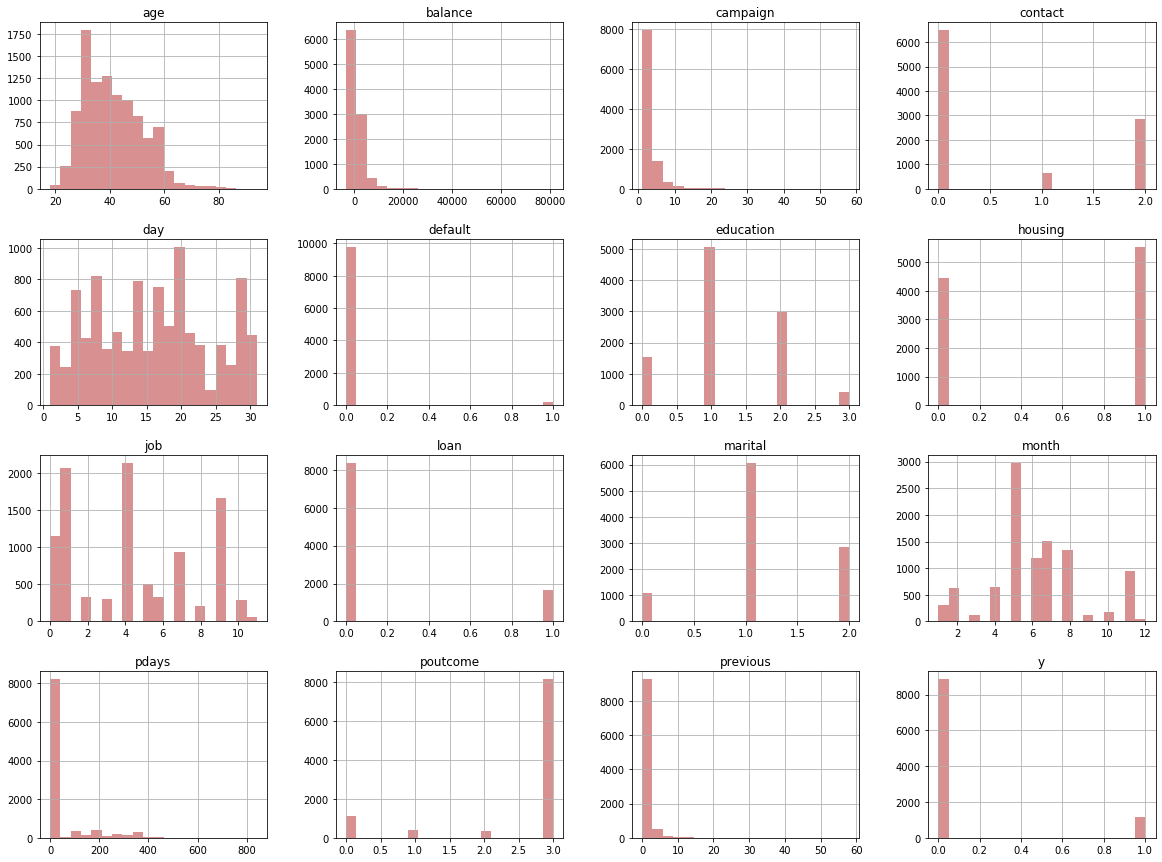

In [70]:
data.hist(color='firebrick', alpha=0.5, bins=20, figsize=(20, 15))
plt.show()

- From the above histogram plots, it can be seen that the people aged from 30 to 40 are highly targeted for the marketing campaign. 
- Each client was approached at least 1 to 3 times during the marketing campaign.
- Most clients are contacted on their cell phones.
- Most of the clients worked a blue-collar, management, or technician job.
- Most of the clients did not own a loan.
- Most of the clients have attained either secondary or tertiary education.
- Most of the clients own house loans.
- Most clients were married.
- The marketing campaign was highly in action during May month.
- The outcome of the previous campaign was either unknown or failure. There was a very low success rate.
- The outcomes of the campaign has very few success compared to its failure rate.

In [71]:
# Check the original value for the categorical column
# get_sorted(y_dic)

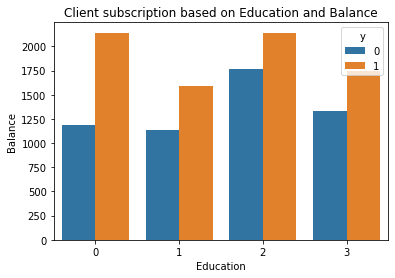

In [72]:
sns.barplot(x='education', y='balance', hue='y', data=data, ci=None)
plt.title('Client subscription based on Education and Balance')
plt.xlabel('Education')
plt.ylabel('Balance')
plt.show()

From the above data, it can be observed that the people who have attained tertiary education have a high yearly average balance are more likely to subscribe to the term deposit. The people who have attained secondary education, and have high yearly average balance are least likely to subscribe when compared to the people who have tertiary education.

In [73]:
# get_sorted(education_dic)

<Figure size 432x288 with 0 Axes>

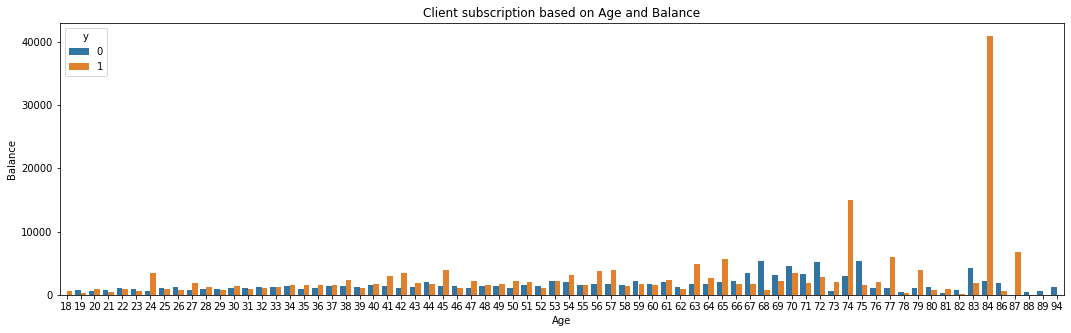

In [74]:
import matplotlib.ticker as ticker

plt.clf()
plt.figure(figsize=(18,5))
bar = sns.barplot(x='age', y='balance', hue='y',data=data, ci=None)
bar.yaxis.set_major_locator(ticker.MultipleLocator(10000))
bar.yaxis.set_major_formatter(ticker.ScalarFormatter())
plt.title('Client subscription based on Age and Balance')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.show()

From the above graph, it can be observed that the people with age around 60 to 85 have high yearly average balance compared to younger people. They are also more likely to accept the subscription offer from the marketing campaign.

In [75]:
data_corr = data.corr()

<Figure size 432x288 with 0 Axes>

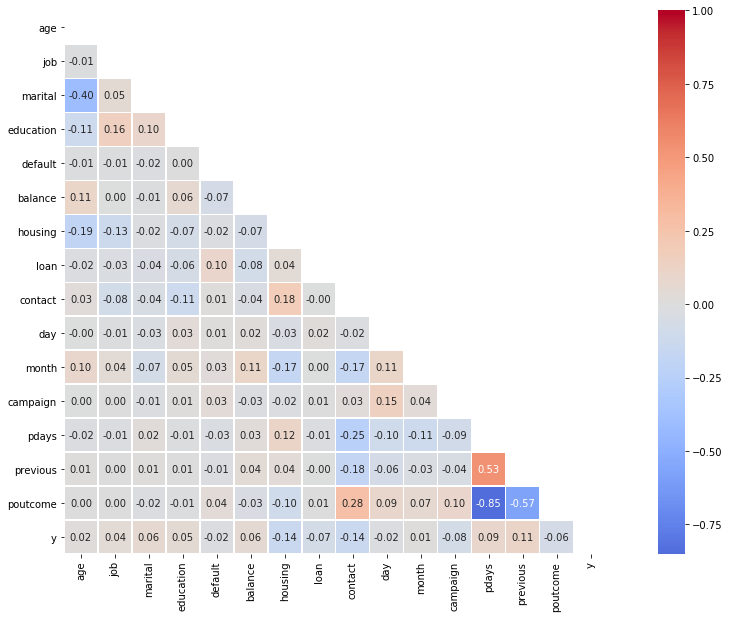

In [76]:
plt.clf()  # Clear previous plt figure
mask = np.triu(np.ones_like(data_corr, dtype=bool))
f, ax = plt.subplots(figsize=(18, 10))
sns.heatmap(data_corr,
            mask=mask,
            cmap='coolwarm',
            annot=True,
            center=0,
            fmt=".2f",
            square=True,
            linewidths=.5)
plt.show()

From the above correlation matrix, it can be observed that the previous, pdays, education, and balance columns correlate with the final decision of the marketing campaign.

## Splitting the data into Training and Test dataset

### Data splitted into 70% Training and 30% Testing

In [77]:
train = data[:7000]

In [78]:
test = data[7000:]

In [79]:
train_x = train.iloc[:, :-1]
train_y = train.iloc[:, -1]

In [80]:
test_x = test.iloc[:, :-1]
test_y = test.iloc[:, -1]

### Normalizing Data

In [81]:
train_x = (train_x - train_x.mean()) / train_x.std()
test_x = (test_x - test_x.mean()) / test_x.std()

### Keeping only the columns which were identified to have high correlation

In [82]:
drop_cols = [
    'job', 'marital', 'default', 'balance', 'housing', 'loan', 'contact',
    'day', 'month', 'campaign', 'pdays', 'poutcome'
]

# Columns with Correlation: 'previous', 'education', 'age'
# Columns Kept: 'previous', 'education', 'age'

train_x.drop(drop_cols, inplace=True, axis=1)
test_x.drop(drop_cols, inplace=True, axis=1)

### Converting data into numpy arrays

In [83]:
train_x = train_x.to_numpy()
train_y = train_y.to_numpy()
test_x = test_x.to_numpy()
test_y = test_y.to_numpy()

# III. Method

## Model Review

### Pocket Algorithm
The Pocket algorithm solves the problem of instability encountered in the Perceptron algorithm. So, to understand the Pocket algorithm, let's explore the Perceptron algorithm. Perceptron algorithm is the simple binary classification algorithm that applies a step function on training samples iteratively and updates the weights in a way that results in more accurate predictions.

Perceptron algorithm is only useful for the linearly separable data where the convergence is guaranteed. But for the data which is not linearly separable, the convergence is not guaranteed. Another problem with the perceptron algorithm is that the algorithm selects an arbitrary hyperplane to divide two classes, so the decision boundary could not always fit properly. To solve the instability faced in the perception algorithm, the pocket algorithm saves the best solution in its pocket after each iteration.

### QDA Algorithm
The Quadratic Discriminant Analysis is a generative model that assumes a Gaussian likelihood. In the QDA algorithm, the individual covariance matrix for each class in the dataset is estimated. The decision boundary is determined using the quadratic equation. QDA allows more flexibility for the covariance matrix and fits better than LDA but it has more parameters to estimate. The drawback of the QDA algorithm is that the number of parameters increases significantly because the individual covariance matrix is calculated for each class in the dataset. If the number of classes is higher than the records in the dataset, then the resulting class boundary has a high chance of overfitting.

### LDA Algorithm
The Linear Discriminant Analysis is also a generative model that assumes a Gaussian likelihood. The main difference between LDA and QDA is that the covariance matrix for each class is assumed to be identical in LDA but in QDA, the covariance matrix is calculated for each class in the dataset. It solves the problem faced in the QDA algorithm by using the same covariance for all classes. The decision boundary is determined by using the linear function.

### Logistic Algorithm
Logistic regression is a statistical method like a linear regression model that predicts an outcome for the binary variable from one or many dependent variables. Unlike linear regression, the predictor variable does not need to be continuous data. It can contain categorical or continuous data. Instead of probabilities and least squares to fit the model, Logistic regression uses log odds ratio and maximum likelihood for classification.

## Model Implementation and Description

In [84]:
import numpy as np
from abc import ABC, abstractmethod
from copy import deepcopy as copy

### A. Super Class Definition

The *BaseModel* class contains superclass definitions for the general classification model. The abstract methods like train and use enable us to have unified interfaces for child classes to be overridden.

In [85]:
class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

### Abstract Class Definition for Classification
The superclass *Classifier* defines the common utility methods like normalize, check matrix, and add ones that can be utilized by the classification models implementation like Pocket Algorithm, QDA, LDA, and Logistic Regression classes.
- The normalize function normalizes the array by applying the normalization formula.
- The _check_matrix function checks whether the matrix shape is 2 dimensional or not. If not, then it throws a wrong matrix exception.
- The add_ones function calls the _check_matrix function to first check whether the matrix is 2D and if it has the correct shape, then it adds a 1's column to the matrix.
- The train abstract function is created for training the algorithm.
- The use of abstract function is created for testing the algorithm.

In [86]:
class Classifier(BaseModel):
    """
        Abstract class for classification 

        Attributes
        ==========
        meanX       ndarray
                    mean of inputs (from standardization)
        stdX        ndarray
                    standard deviation of inputs (standardization)
    """

    def __init__(self, ):
        self.meanX = None
        self.stdX = None

    def normalize(self, X):
        """ standardize the input X """

        if not isinstance(X, np.ndarray):
            X = np.asanyarray(X)

        self.meanX = np.mean(X, 0)
        self.stdX = np.std(X, 0)

        # TODO: Finish this normalization
        Xs = (X - self.meanX) / self.stdX
        return Xs

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))

    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

### B. Pocket Algorithm
The Pocket class implements the Pocket algorithm by inheriting the Classifier class. The class contains 3 attributes: alpha, maxiter, and w_pocket. The alpha is the learning rate for training the algorithm, maxiter is the number of iterations required to train the model, and w_pocket is the array required to store the best weight solution from the iterations. The train function starts with initializing zeros with the number of features + 1 size for both weight and pocket weight. Then based on the number of iterations specified, the weight would be computed and compared to save the best solution in the w_pocket array. The use function normalizes the test data and utilizes the pocket weight to calculate the predictions for test data.

In [87]:
class Pocket(Classifier):
    """
    Implementation class for Pocket Algorithm

    Attributes
    ==========
    alpha       float
                learning rate for training the algorithm
    maxiter     integer
                number of iterations
    w_pocket    ndarray
                weight pocket for saving best solution
    """

    def __init__(self, alpha, maxiter=1000):
        Classifier.__init__(self)
        self.alpha = alpha
        self.maxiter = maxiter
        self.w_pocket = None

    def train(self, X, T):
        w = np.zeros(X.shape[1] + 1)  # Features + 1
        self.w_pocket = copy(w)
        N = X.shape[0]
        X1 = self.add_ones(X)
        for i in range(self.maxiter):
            converged = True
            for k in np.random.permutation(N):
                y = w @ X1[k]
                if np.sign(y) != np.sign(T[k]):
                    w += self.alpha * T[k] * X1[k]
                    converged = False
                    y = self.normalize(np.sign(X1 @ w))
                    yp = self.normalize(np.sign(X1 @ self.w_pocket))
                    if np.sum(y == T) >= np.sum(yp == T):
                        self.w_pocket[:] = w[:]
            if converged:
                break
        return self.w_pocket

    def use(self, X):
        X1 = self.add_ones(X)
        return self.normalize(X1 @ self.w_pocket)

### C. QDA
The QDA class implements the Quadratic Discriminant Analysis by inheriting the Classifier class. The QDA class contains attributes like mu, sigma, and prior values for both the classes. In the train function, the training data is normalized and then the mean and covariance of the data are calculated. The qda function is the utility function to calculate the determinant. In the use function, the test data is applied with the quadratic discriminant formula to calculate the predictions.

In [88]:
class QDA(Classifier):
    """
    Implementation class for QDA Algorithm

    Attributes
    ==========
    mu1         ndarray
                mean of the first class
    mu2         ndarray
                mean of the second class
    sigma1      ndarray
                covariation of the first class
    sigma2      ndarray
                covariation of the second class
    prior1      float
                prior value of the first class
    prior2      float
                prior value of the second class
    """

    def __init__(self):
        Classifier.__init__(self)
        self.mu1 = None
        self.mu2 = None
        self.sigma1 = None
        self.sigma2 = None
        self.prior1 = None
        self.prior2 = None

    def train(self, X, T):
        C1 = X[T == 0]
        C2 = X[T == 1]

        N1 = C1.shape[0]
        N2 = C2.shape[0]
        N = X.shape[0]

        self.prior1 = N1 / N
        self.prior2 = N2 / N

        X1 = np.vstack((C1, C2))
        X1 = self.normalize(X1)

        self.mu1 = np.mean(X1[:N1], 0)
        self.mu2 = np.mean(X1[N1:N], 0)

        self.sigma1 = np.cov(X1[:N1].T)
        self.sigma2 = np.cov(X1[N1:N].T)

    def qda(self, X, mu, sigma, prior):
        sigma_inv = np.linalg.inv(sigma)
        diffv = X - mu
        y = - 0.5 * np.log(np.linalg.det(sigma)) \
            - 0.5 * np.sum(diffv @ sigma_inv * diffv, axis=1) \
            + np.log(prior)
        return self.normalize(y)

    def use(self, X):
        X1 = self.normalize(X)
        d1 = self.qda(X1, self.mu1, self.sigma1, self.prior1)
        d2 = self.qda(X1, self.mu2, self.sigma2, self.prior2)
        return d1, d2

### D. LDA
The LDA class implements the Linear Discriminant Analysis by inheriting the Classifier class. The LDA class contains attributes like mu, sigma, and prior values for both the classes. In the train function, the training data is normalized and then the mean of the data are calculated for both the classes. The lda is the utility function to calculate the determinant. In the use function, the test data is applied with the linear discriminant formula to calculate the predictions.

In [89]:
class LDA(Classifier):
    """
    Implementation class for LDA Algorithm

    Attributes
    ==========
    mu1         ndarray
                mean of the first class
    mu2         ndarray
                mean of the second class
    sigma       ndarray
                covariation of the data
    prior1      float
                prior value of the first class
    prior2      float
                prior value of the second class    
    """

    def __init__(self):
        Classifier.__init__(self)
        self.mu1 = None
        self.mu2 = None
        self.sigma = None
        self.prior1 = None
        self.prior2 = None

    def train(self, X, T):
        C1 = X[T == 0]
        C2 = X[T == 1]

        N1 = C1.shape[0]
        N2 = C2.shape[0]
        N = X.shape[0]

        self.prior1 = N1 / N
        self.prior2 = N2 / N

        X1 = np.vstack((C1, C2))
        X1 = self.normalize(X1)

        self.mu1 = np.mean(X1[:N1], 0)
        self.mu2 = np.mean(X1[N1:N], 0)

        self.sigma = np.cov(X1.T)

    def lda(self, X, mu, sigma, prior):
        sigma_inv = np.linalg.inv(sigma)
        y = np.sum((X @ sigma_inv) * mu - 0.5 *
                   (mu @ sigma_inv) * mu, axis=1) + np.log(prior)
        return self.normalize(y)

    def use(self, X):
        X1 = self.normalize(X)
        d1 = self.lda(X1, self.mu1, self.sigma, self.prior1)
        d2 = self.lda(X1, self.mu2, self.sigma, self.prior2)
        return d1, d2

### E. Logistic Regression
The LogisticRegression class implements the Logistic Regression model by inheriting the Classifier class. The Logistic Regression class contains attributes like alpha, maxiter, and w. The alpha is the learning rate for training the model, maxiter is the number of iterations, and w is for storing the calculated weight of the training data. The g is the softmax transformation utility function to calculate the gradient descent. The train function normalizes the data, adds one's column to the feature array, and initializes weight to random values. It then starts the iteration and applies the gradient descent algorithm to calculate the weight. The use function normalizes the test data, adds one's column, and applies gradient descent for calculating the prediction.

In [90]:
class LogisticRegression(Classifier):
    """
    Implementation class for Logistic Regression model

    Attributes
    ==========
    alpha       float
                learning rate for training the algorithm
    maxiter     integer
                number of iterations
    w           ndarray
                weights
    """

    def __init__(self, alpha, maxiter=1000):
        Classifier.__init__(self)
        self.alpha = alpha
        self.maxiter = maxiter
        self.w = None

    def g(self, X, w):
        z = X @ w
        if not isinstance(z, np.ndarray):
            z = np.asarray(z)
        f = np.exp(z)
        return f / (np.sum(f, axis=1, keepdims=True)
                    if len(z.shape) == 2 else np.sum(f))

    def train(self, X, T):
        X1 = self.add_ones(self.normalize(X))
        N = X.shape[0]
        D = X.shape[1]
        self.w = np.random.rand(D + 1, 2)
        Tn = T.reshape(-1, 1)
        T1 = self.add_ones(Tn)
        for step in range(self.maxiter):
            ys = self.g(X1, self.w)
            self.w += self.alpha * X1.T @ (T1 - ys)

    def use(self, X):
        X1 = self.add_ones(self.normalize(X))
        return self.g(X1, self.w)

### Confusion Matrix
The Confusion Matrix helps to understand the performance of the classification model by displaying the true positives, true negatives, false positives, and false negatives. The confusion matrix function uses the target array and predicted array to calculate the confusion matrix for understanding the performance of the implemented classification models.

In [91]:
def confusion_matrix(Y, T):
    if len(Y) != len(T):
        raise ValueError("Prediction and Target length not matched!")
    classes = np.unique(T)
    n_classes = len(classes)
    cf = pd.DataFrame(np.zeros((n_classes, n_classes)),
                      index=classes,
                      columns=classes,
                      dtype=int)
    Tidx = [T == c for c in classes]
    for c in classes:
        pred_idx = Y == c
        cf.loc[c, :] = [
            np.sum(np.logical_and(pred_idx, tidx)) for tidx in Tidx
        ]
    return cf

### Model Evaluation
The model evaluation function takes confusion matrix as an input and calculates the model accuracy, precision, recall, and F1 score.

In [92]:
def model_evaluation(cf):
    print("Model Evaluation:\n")
    diagonal = cf.to_numpy().trace()
    total = cf.to_numpy().sum()
    accuracy = np.round(diagonal / total, 2) * 100
    print(f"Accuracy:\t{np.round(accuracy)} %\n")
    labels = ["Not Subscribed", "Subscribed"]
    for i in range(len(labels)):
        print(f"{labels[i]}:")
        precision = cf.iloc[i, i] / np.sum(cf.iloc[i, :])
        recall = cf.iloc[i, i] / np.sum(cf.iloc[:, i])
        f1 = 2 * precision * recall / (precision + recall)
        print(f"Precision:\t{np.round(precision, 2)}")
        print(f"Recall:\t\t{np.round(recall,2)}")
        print(f"F1:\t\t{np.round(f1,2)}")
        print("")

In [93]:
def accuracy(cf):
    diagonal = cf.to_numpy().trace()
    total = cf.to_numpy().sum()
    accuracy = np.round(diagonal / total, 2) * 100
    return accuracy

# IV. Experiments

In this section, the Pocket algorithm, QDA, LDA, and Logistic Regression model implemented in the previous section will be applied to the bank marketing dataset to predict whether the customer has subscribed or not subscribed to the term deposit. 

The dataset is split into testing and training sets. I have used 70% of data for testing and 30% for testing. After applying all the different Classification models, the predicted data will be visualized and analyzed to compare the performance of the algorithms.

## Applying Pocket Algorithm
The pocket algorithm implemented in the previous section will be applied on the bank marketing dataset. It will be first applied on the 70% of the training data and then it will be applied on the 30% of the test data. To apply the pocket algorithm, the alpha is set to 0.1 and maximum iterations are set to 1,000.

**Since Pocket Algorithm requires lot of time to train on 7,000 data samples, I have used 700 data samples to demonstrate the classification model. The model will be then tested on 300 data samples.**

In [94]:
alpha = 0.1
maxiter = 1000
p = Pocket(alpha, maxiter)
p.train(train_x[:700], train_y[:700])

C:\Users\shahv\anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide


array([0.3       , 0.01410269, 0.04257869, 0.27357687])

In [95]:
pocket_pred = p.use(test_x[:700])

### Visualizations for the Pocket Algorithm

Below is the visualization of the data for exploring the comparison between the actual and predicted values:

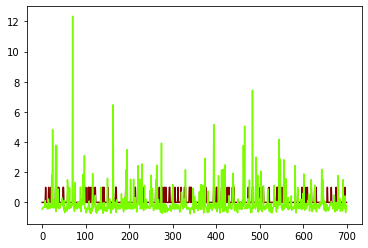

In [96]:
plt.clf()
plt.plot(test_y[:700], color="maroon")
plt.plot(pocket_pred[:700], color="lawngreen")

Below is the visualization of data after normalizing the predicted values:

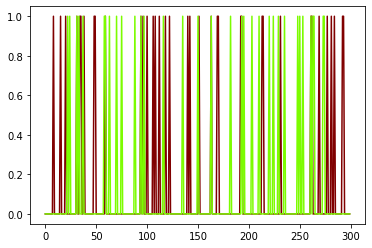

In [97]:
plt.clf()
plt.plot(test_y[:300], color="maroon")
plt.plot(np.where(pocket_pred > 0.5, 1, 0)[:300], color="lawngreen")

#### Calculating the Confusion Matrix for the Pocket Algorithm

In [98]:
cf_pocket = confusion_matrix(test_y[:300],
                             np.where(pocket_pred[:300] > 0.5, 1, 0))
cf_pocket

,0,1
0,235,28
1,31,6


#### Calculating the Model Evaluation Metrics

In [99]:
model_evaluation(cf_pocket)

Model Evaluation:

Accuracy:	80.0 %

Not Subscribed:
Precision:	0.89
Recall:		0.88
F1:		0.89

Subscribed:
Precision:	0.16
Recall:		0.18
F1:		0.17



Below is the visualization of the confusion matrix that displays false positives, false negatives, true positives, and true negatives that are computed by the Pocket Algorithm model.

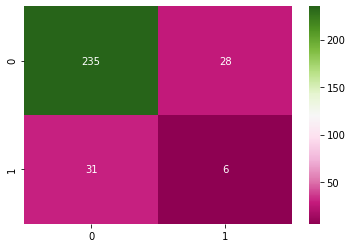

In [100]:
sns.heatmap(cf_pocket, annot=True, cmap="PiYG", fmt='g')

In [101]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score

In the below visualization, the ROC curve is the plot to understand the performance of the Pocket algorithm on the test dataset. The ROC curve will help to understand the capability of the model to distinguish between the classes. 

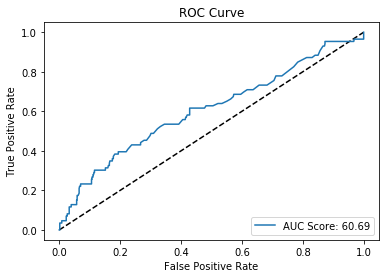

In [102]:
pocket_fpr, pocket_tpr, _ = roc_curve(test_y[:700], pocket_pred)
plt.plot([0, 1], [0, 1], 'k--')
pocket_auc = roc_auc_score(test_y[:700], pocket_pred)
plt.plot(pocket_fpr,
         pocket_tpr,
         label=f"AUC Score: {np.round(pocket_auc*100,2)}")
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

Below is the Precision-Recall curve for the predicted data:

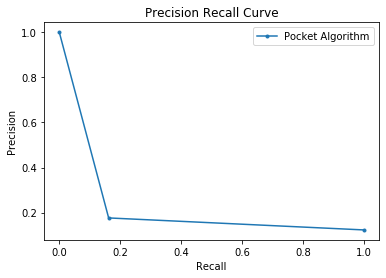

In [103]:
precision, recall, _ = precision_recall_curve(
    test_y[:300], np.where(pocket_pred[:300] > 0.5, 1, 0))
plt.plot(recall, precision, marker='.', label='Pocket Algorithm')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.legend()
plt.show()

Below is the Average Precision-Recall curve for the predicted data:

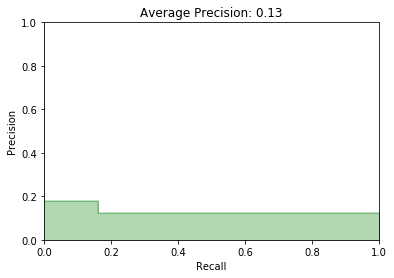

In [104]:
avg_prec = average_precision_score(test_y[:300],
                                   np.where(pocket_pred[:300] > 0.5, 1, 0))
precision, recall, _ = precision_recall_curve(
    test_y[:300], np.where(pocket_pred[:300] > 0.5, 1, 0))
plt.step(recall, precision, color='green', where='post', alpha=0.3)
plt.fill_between(recall, precision, color='green', step='post', alpha=0.3)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title(f"Average Precision: {np.round(avg_prec,2)}")
plt.show()

## Applying QDA Model
The QDA class implemented in the previous section will be applied to the bank marketing dataset. The classification algorithm will be first applied to 70% of the training data and then it will be applied to 30% of the test data to test the performance of the model.

In [105]:
qda = QDA()
qda.train(train_x, train_y)
d1, d2 = qda.use(test_x)
qda_pred = np.argmax(np.array([d1, d2]), axis=0)

#### Calculating the Confusion Matrix for the QDA Model

In [106]:
cf_qda = confusion_matrix(test_y, qda_pred)
cf_qda

,0,1
0,673,1981
1,84,262


#### Calculating the Model Evaluation Metrics

In [107]:
model_evaluation(cf_qda)

Model Evaluation:

Accuracy:	31.0 %

Not Subscribed:
Precision:	0.25
Recall:		0.89
F1:		0.39

Subscribed:
Precision:	0.76
Recall:		0.12
F1:		0.2



Below is the visualization of the confusion matrix computed for the QDA model:

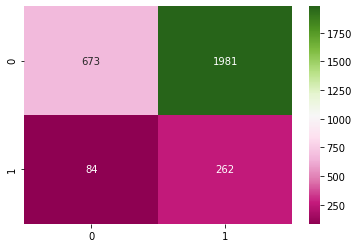

In [108]:
sns.heatmap(cf_qda, annot=True, cmap="PiYG", fmt='g')

Below is the visualization of the QDA Discriminant functions graphed on a 3D plot

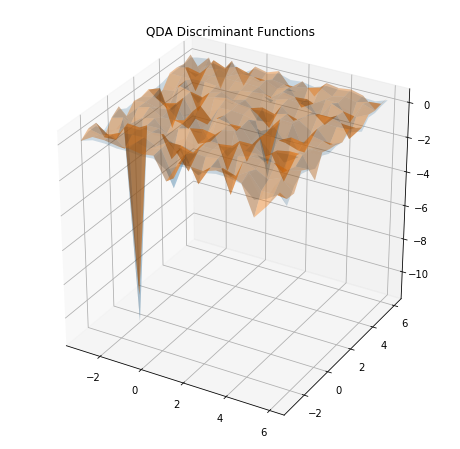

In [109]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8, 8))
ax = fig.gca(projection='3d')
xs, ys = np.meshgrid(np.linspace(-3, 6, 17), np.linspace(-3, 6, 17))
Xtest = np.vstack((xs.flat, ys.flat)).T
ax.plot_surface(xs, ys, d1[:289].reshape(xs.shape), alpha=0.2)
ax.plot_surface(xs, ys, d2[:289].reshape(xs.shape), alpha=0.4)
plt.title("QDA Discriminant Functions")
plt.show()

Below is the visualization of the decision boundary for the QDA model:

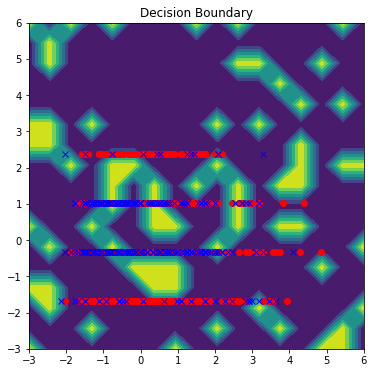

In [110]:
C1 = test_x[test_y == 0]
C2 = test_x[test_y == 1]
N1 = C1.shape[0]
N2 = C2.shape[0]
N = train_x.shape[0]
prior1 = N1 / N
prior2 = N2 / N
plt.figure(figsize=(6, 6))
plt.contourf(xs, ys, (d1[:289] - d2[:289] > 0).reshape(xs.shape))
plt.title("Decision Boundary")
plt.plot(C1[:, 0], C1[:, 1], 'or')
plt.plot(C2[:, 0], C2[:, 1], 'xb')
plt.show()

Below is the plot of generative distributions  p(x | Class=k) starting with discriminant functions:

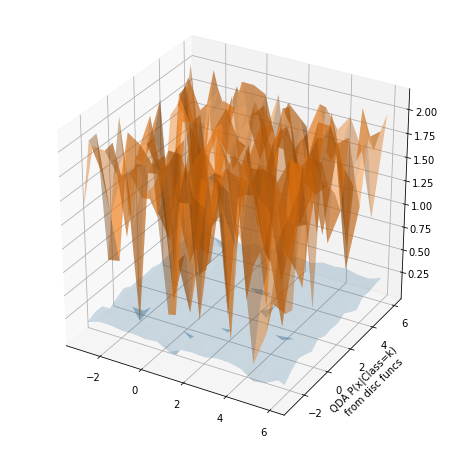

In [111]:
fig = plt.figure(figsize=(8, 8))
ax = fig.gca(projection='3d')

prob1 = np.exp(d1[:289].reshape(xs.shape) -
               0.5 * test_x.shape[1] * np.log(2 * np.pi) - np.log(prior1))
prob2 = np.exp(d2[:289].reshape(xs.shape) -
               0.5 * test_x.shape[1] * np.log(2 * np.pi) - np.log(prior2))

ax.plot_surface(xs, ys, prob1, alpha=0.2)
ax.plot_surface(xs, ys, prob2, alpha=0.4)

plt.ylabel("QDA P(x|Class=k)\n from disc funcs", multialignment="center")
plt.show()

In the below visualization, the ROC curve is the plot to understand the performance of the QDA model on the test dataset:

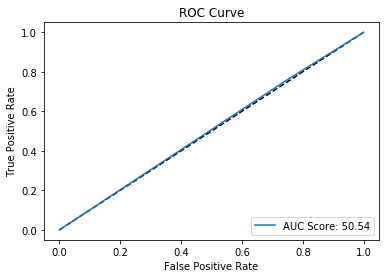

In [112]:
qda_fpr, qda_tpr, _ = roc_curve(test_y, qda_pred)
plt.plot([0, 1], [0, 1], 'k--')
qda_auc = roc_auc_score(test_y, qda_pred)
plt.plot(qda_fpr, qda_tpr, label=f"AUC Score: {np.round(qda_auc*100,2)}")
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

Below is the Precision-Recall curve for the predicted values:

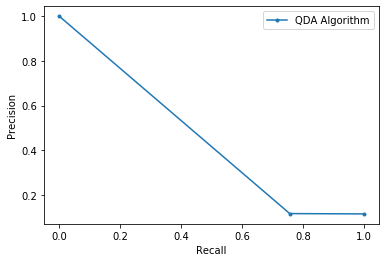

In [113]:
precision, recall, _ = precision_recall_curve(test_y, qda_pred)
plt.plot(recall, precision, marker='.', label='QDA Algorithm')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

Below is the Average Precision-Recall curve for the predicted data:

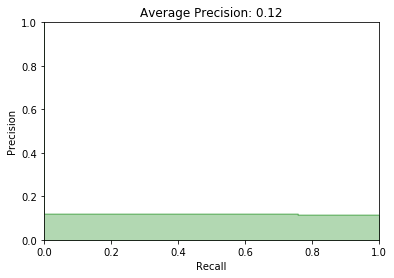

In [114]:
avg_prec = average_precision_score(test_y, qda_pred)
precision, recall, _ = precision_recall_curve(test_y, qda_pred)
plt.step(recall, precision, color='green', where='post', alpha=0.3)
plt.fill_between(recall, precision, color='green', step='post', alpha=0.3)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title(f"Average Precision: {np.round(avg_prec,2)}")
plt.show()

## Applying LDA Algorithm
The LDA class implemented in the previous section will be applied to the bank marketing dataset. The classification algorithm will be first applied to 70% of the training data and then it will be applied to 30% of the test data to test the performance of the model.

In [115]:
lda = LDA()
lda.train(train_x, train_y)
d1, d2 = lda.use(test_x)
lda_pred = np.argmax(np.array([d1, d2]), axis=0)

In [116]:
np.unique(lda_pred, return_counts=True)

(array([0, 1], dtype=int64), array([1894, 1106], dtype=int64))

#### Calculating the Confusion Matrix for the LDA Model

In [117]:
cf_lda = confusion_matrix(test_y, lda_pred)
cf_lda

,0,1
0,1730,924
1,164,182


#### Calculating the Model Evaluation Metrics

In [118]:
model_evaluation(cf_lda)

Model Evaluation:

Accuracy:	64.0 %

Not Subscribed:
Precision:	0.65
Recall:		0.91
F1:		0.76

Subscribed:
Precision:	0.53
Recall:		0.16
F1:		0.25



Below is the visualization of the confusion matrix for the LDA model.

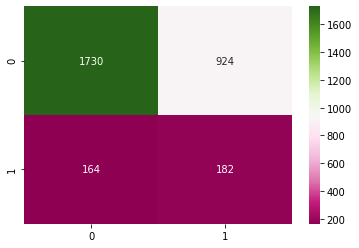

In [119]:
sns.heatmap(cf_lda, annot=True, cmap="PiYG", fmt='g')

Below is the visualization of the LDA Discriminant functions graphed on a 3D plot

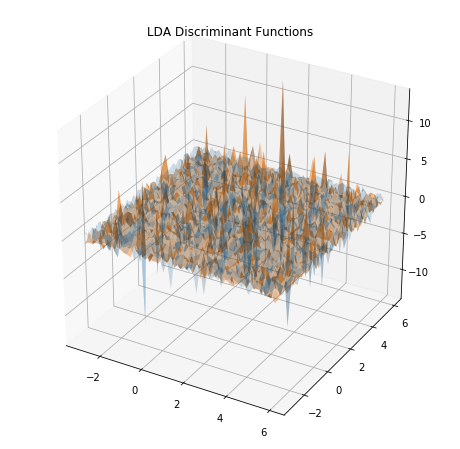

In [120]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8, 8))
ax = fig.gca(projection='3d')
xs, ys = np.meshgrid(np.linspace(-3, 6, 54), np.linspace(-3, 6, 54))
Xtest = np.vstack((xs.flat, ys.flat)).T
ax.plot_surface(xs, ys, d1[:2916].reshape(xs.shape), alpha=0.2)
ax.plot_surface(xs, ys, d2[:2916].reshape(xs.shape), alpha=0.4)
plt.title("LDA Discriminant Functions")
plt.show()

Below is the visualization of the decision boundary for the LDA model:

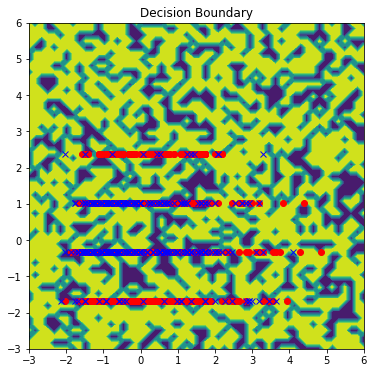

In [121]:
C1 = test_x[test_y == 0]
C2 = test_x[test_y == 1]
N1 = C1.shape[0]
N2 = C2.shape[0]
N = train_x.shape[0]
prior1 = N1 / N
prior2 = N2 / N
plt.figure(figsize=(6, 6))
plt.contourf(xs, ys, (d1[:2916] - d2[:2916] > 0).reshape(xs.shape))
plt.title("Decision Boundary")
plt.plot(C1[:, 0], C1[:, 1], 'or')
plt.plot(C2[:, 0], C2[:, 1], 'xb')
plt.show()

Below is the ROC curve for the LDA model on the test dataset:

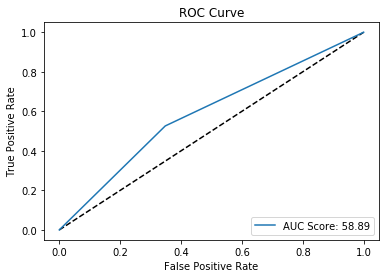

In [122]:
lda_fpr, lda_tpr, _ = roc_curve(test_y, lda_pred)
plt.plot([0, 1], [0, 1], 'k--')
lda_auc = roc_auc_score(test_y, lda_pred)
plt.plot(lda_fpr, lda_tpr, label=f"AUC Score: {np.round(lda_auc*100,2)}")
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

Below is the Precision-Recall curve for the LDA model:

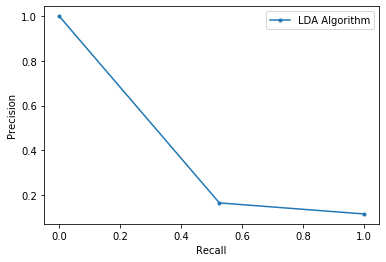

In [123]:
precision, recall, _ = precision_recall_curve(test_y, lda_pred)
plt.plot(recall, precision, marker='.', label='LDA Algorithm')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

Below is the Average Precision-Recall curve for the LDA model:

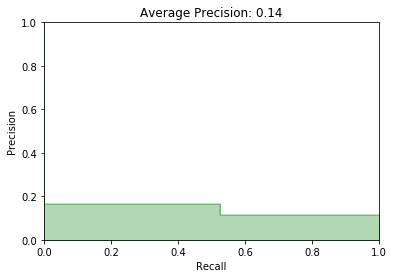

In [124]:
avg_prec = average_precision_score(test_y, lda_pred)
precision, recall, _ = precision_recall_curve(test_y, lda_pred)
plt.step(recall, precision, color='green', where='post', alpha=0.3)
plt.fill_between(recall, precision, color='green', step='post', alpha=0.3)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title(f"Average Precision: {np.round(avg_prec,2)}")
plt.show()

## Applying Logistic Regression
The Logistic Regression class implemented in the previous section will be applied to the bank marketing dataset. The algorithm will be first applied to 70% of the training data and then it will be applied on 30% of the test data to test the performance of the model.

In [125]:
alpha = 0.0000001
maxiter = 1000
log_reg = LogisticRegression(alpha, maxiter)
log_reg.train(train_x, train_y)

In [126]:
pred_y = log_reg.use(test_x)
log_reg_pred = np.argmax(pred_y, 1)

In [127]:
np.unique(test_y, return_counts=True)
np.unique(log_reg_pred, return_counts=True)

(array([0, 1], dtype=int64), array([2343,  657], dtype=int64))

#### Calculating the Confusion Matrix for the Logistic Regression

In [128]:
cf_log_reg = confusion_matrix(test_y, log_reg_pred)
cf_log_reg

,0,1
0,2066,588
1,277,69


#### Calculating the Model Evaluation Metrics

In [129]:
model_evaluation(cf_log_reg)

Model Evaluation:

Accuracy:	71.0 %

Not Subscribed:
Precision:	0.78
Recall:		0.88
F1:		0.83

Subscribed:
Precision:	0.2
Recall:		0.11
F1:		0.14



Below is the visualization of the confusion matrix computed for the Logistic Regression:

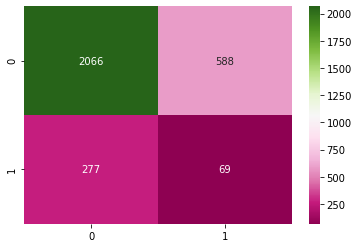

In [130]:
sns.heatmap(cf_log_reg, annot=True, cmap="PiYG", fmt='g')

Below is the visualization of the Decision Boundary:

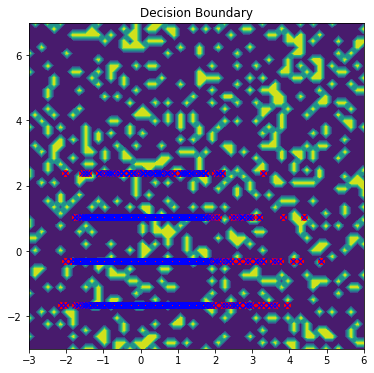

In [131]:
x = np.linspace(-3, 6, 54)
y = np.linspace(-3, 7, 54)
xs, ys = np.meshgrid(x, y)

plt.figure(figsize=(6, 6))
plt.contourf(xs, ys, log_reg_pred[:2916].reshape(xs.shape))
plt.title("Decision Boundary")
plt.plot(test_x[:, 0], test_x[:, 1], 'or')
plt.plot(test_x[:, 0], test_x[:, 1], 'xb')
plt.show()

Below is the ROC curve for the Logistic Regression model on the test dataset:

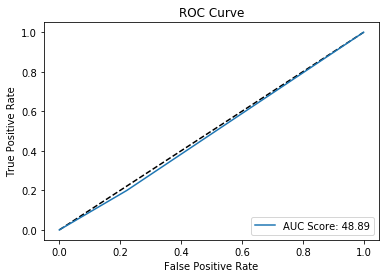

In [132]:
log_reg_fpr, log_reg_tpr, _ = roc_curve(test_y, log_reg_pred)
plt.plot([0, 1], [0, 1], 'k--')
log_reg_auc = roc_auc_score(test_y, log_reg_pred)
plt.plot(log_reg_fpr,
         log_reg_tpr,
         label=f"AUC Score: {np.round(log_reg_auc*100,2)}")
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

Below is the Precision-Recall curve for the Logistic Regression model:

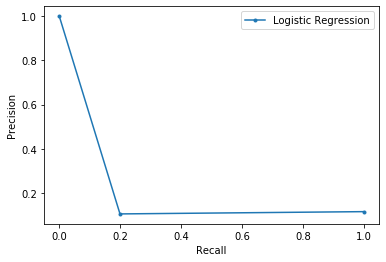

In [133]:
precision, recall, _ = precision_recall_curve(test_y, log_reg_pred)
plt.plot(recall, precision, marker='.', label='Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

Below is the Average Precision-Recall curve for the Logistic Regression model:

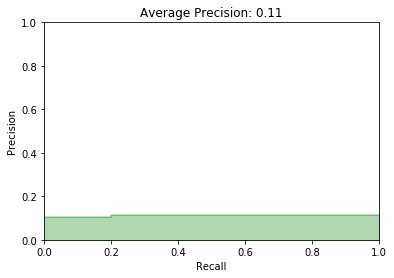

In [134]:
avg_prec = average_precision_score(test_y, log_reg_pred)
precision, recall, _ = precision_recall_curve(test_y, log_reg_pred)
plt.step(recall, precision, color='green', where='post', alpha=0.3)
plt.fill_between(recall, precision, color='green', step='post', alpha=0.3)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title(f"Average Precision: {np.round(avg_prec,2)}")
plt.show()

# Conclusion

## Classificaion Model Comparison

In the above section, all the four classification algorithms were applied and visualized for classifying whether the customers will subscribe to the term deposit or not. The performance of all the four algorithms was calculated by using confusion matrix, accuracy score, precision, recall, F1 score, and ROC curve in the above section. The accuracy of some model was better than others. But to find out the best performing algorithm, I have used **AUC score** to evaluate the four Classification models. Below is the performance comparison plot to understand the accuracy metrics and ROC curves for the classification models:

### Accuracy Comparison

<Figure size 432x288 with 0 Axes>

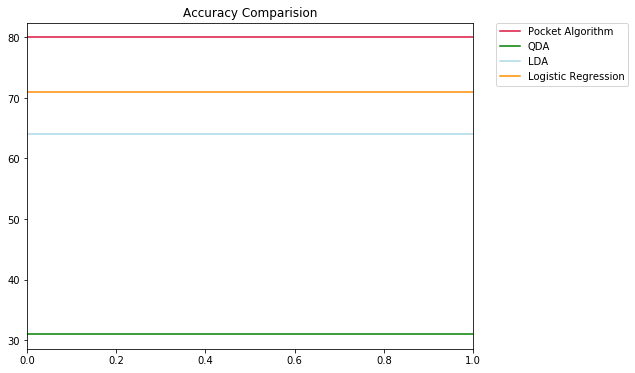

In [135]:
plt.clf()
plt.figure(figsize=(8, 6))
plt.axhline(y=accuracy(cf_pocket), label="Pocket Algorithm", color='crimson')
plt.axhline(y=accuracy(cf_qda), label="QDA", color='green')
plt.axhline(y=accuracy(cf_lda), label="LDA", color='lightblue')
plt.axhline(y=accuracy(cf_log_reg),
            label="Logistic Regression",
            color='darkorange')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('Accuracy Comparision')
plt.show()

Since the accuracy score is an overall measure of all the classes, it is not enough for understanding the performance of the classification algorithms. I have utilized the AUC score to make sure that the model is reliable for predicting the accurate results for the bank marketing dataset.

### ROC and AUC Comparision

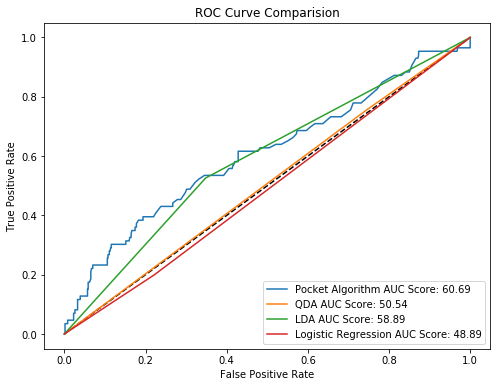

In [136]:
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(pocket_fpr,
         pocket_tpr,
         label=f"Pocket Algorithm AUC Score: {np.round(pocket_auc*100,2)}")
plt.plot(qda_fpr, qda_tpr, label=f"QDA AUC Score: {np.round(qda_auc*100,2)}")
plt.plot(lda_fpr, lda_tpr, label=f"LDA AUC Score: {np.round(lda_auc*100,2)}")
plt.plot(log_reg_fpr,
         log_reg_tpr,
         label=f"Logistic Regression AUC Score: {np.round(log_reg_auc*100,2)}")
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparision')
plt.show()

Based on the above plot, it can be seen that the AUC score for the Pocket algorithm is the highest performing model while the AUC score for the Logistic Regression is the lowest-performing model. Based on the AUC score, it can be concluded that the Pocket algorithm is the best performing algorithm for classifying the bank marketing dataset. I think that the Pocket algorithm performed better than the other algorithms because the algorithm keeps updating the weight and saves the best solution found during the iteration in its pocket while training. Due to this reason, the pocket algorithm performed better than the other three algorithms.

## Final Conclusion

In this assignment, I have learned to implement the Pocket Algorithm, Quadratic Discriminant Analysis (QDA), Linear Discriminant Analysis (LDA), and Logistic Regression models using Object-Oriented Programming. The implementation of all four algorithms helped me to understand how different algorithms differ from each other and their application on the dataset.

The implementation of the Pocket Algorithm was straightforward but the dataset training was very time consuming because the algorithm loops over several iterations to capture the best weight values for the prediction. The implementation of QDA and LDA algorithms were a bit difficult because in both the algorithm, the mean and covariance are calculated individually for each class and then the formula is applied to calculate the discriminants for both the classes. Logistic regression also took some time for me to understand and implement the algorithm.

This assignment also helped me to understand different techniques to determine the performance of the classification models. To determine the performance of all the four models, I calculated several performance metrics like confusion matrix, accuracy score, precision and recall score for each class, F1 score, and ROC curve for all the classification algorithms.

Overall this assignment was very helpful for me to understand how the Classification models are implemented and how it is applied to the dataset to classify the data and compare the performance of the models.

# References

DiGangi, E., &amp; Hefner, J. (2012, October 09). *Ancestry Estimation.* Retrieved from https://www.sciencedirect.com/science/article/pii/B9780123851895000054

S. Moro, P. Cortez, and P. Rita (2014). *Bank Marketing Data Set* (Version 1) [Data file]. Retrieved from https://archive.ics.uci.edu/ml/datasets/Bank+Marketing <br>

S. Moro, P. Cortez, and P. Rita. *A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems*, Elsevier, 62:22-31, June 2014.<br>

S. Moro, R. Laureano, and P. Cortez. *Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology.* In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimaraes, Portugal, October 2011.